In [ ]:
pip install marker-pdf

In [ ]:
# pip install langchain

In [ ]:
# pip install langchain_community

In [ ]:
# pip install torch torchvision transformers

In [ ]:
pip install -U langchain-community

In [ ]:
pip install langchain_qdrant

In [ ]:
pip install qdrant_client

In [ ]:
pip install tiktoken

In [ ]:
from marker.convert import convert_single_pdf
from marker.models import load_all_models


models = load_all_models()
full_text, imaged, out_meta = convert_single_pdf("/content/SpellBook_391834.pdf", models, langs=['en'])

Loaded detection model vikp/surya_det3 on device cpu with dtype torch.float32
Loaded detection model vikp/surya_layout3 on device cpu with dtype torch.float32
Loaded reading order model vikp/surya_order on device cpu with dtype torch.float32
Loaded recognition model vikp/surya_rec2 on device cpu with dtype torch.float32
Loaded texify model to cpu with torch.float32 dtype
Loaded recognition model vikp/surya_tablerec on device cpu with dtype torch.float32


Finding reading order: 100%|██████████| 3/3 [04:37<00:00, 92.37s/it]
Recognizing tables: 0it [00:00, ?it/s]


In [ ]:
# print(full_text)

In [ ]:
# imaged

example of code to be adjusted, then push the chunks with metadata to Qdrant

In [ ]:
from langchain.text_splitter import MarkdownHeaderTextSplitter

# 1. Initialize MarkdownHeaderTextSplitter with the level of header to split on.
# text_splitter = MarkdownHeaderTextSplitter(levels=["1"])
headers_to_split = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
    ("####", "Header 4"),
    ("#####", "Header 5"),
    ("######", "Header 6"),
]


text_splitter = MarkdownHeaderTextSplitter(
    headers_to_split,
    strip_headers=False
)

chunks = text_splitter.split_text(full_text)




levare noise dai chunks


Blip fa un po' cagare, andrebbe cambiato in meglio

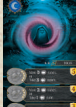

In [ ]:
imaged["11_image_1.png"]

___________________________________ Trying to remove not useful
images____________________________________
(doesnt work)

In [ ]:
# # prompt: read file from openAI.txt and initialize gpt 4o mini

# # Assuming 'openAI.txt' is in the current working directory.  If not,
# # provide the full path.
# from langchain.chat_models import ChatOpenAI

# try:
#     with open("/content/OpenAI.txt", "r") as f:
#         api_key = f.readline().strip() # Read the first line (API key)

# except FileNotFoundError:
#     print("Error: 'openAI.txt' not found. Please ensure the file exists and contains your API key.")
#     api_key = None # or raise an exception, depending on your needs

# if api_key:
#     import os
#     os.environ["OPENAI_API_KEY"] = api_key

#     # Initialize gpt-4-1106-preview (or any other desired model) using langchain

#     try:
#       llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.3)
#       print("GPT-4 initialized successfully!")
#     except Exception as e:
#         print(f"An error occurred while initializing the GPT model: {e}")

<ipython-input-26-6fd50d9e3810>:22: LangChainDeprecationWarning: The class `ChatOpenAI` was deprecated in LangChain 0.0.10 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import ChatOpenAI``.
  llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.3)


GPT-4 initialized successfully!


In [ ]:
# from transformers import BlipProcessor, BlipForConditionalGeneration
# from PIL import Image

# # Load the BLIP model and processor
# processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
# model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")


preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

In [ ]:
# image_descriptions = {}
# chunk_number = 0
# for chunk in chunks:
#     image_descriptions[chunk_number] = []  # Initialize as an empty list for this chunk
#     for image_name in imaged:
#         if image_name in chunk.page_content:
#             image = imaged[image_name].convert("RGB")
#             #Generate caption
#             inputs = processor(image, return_tensors="pt")
#             outputs = model.generate(**inputs)
#             caption = processor.decode(outputs[0], skip_special_tokens=True)
#             image_descriptions[chunk_number].append((image_name, caption))  # Append as a tuple
#     chunk_number += 1
# image_descriptions

In [ ]:
# from langchain.prompts import PromptTemplate

# template_string = '''
# System: Your task is to process the given {chunk} and {image_descriptions}, this last dictionary contains image names that you will find in chunk and also their brief description.
# - Do not modify the content semantically.
# - Remove image references if they seem misplaced or irrelevant to the game explanation, base yuor reasoning on the image description and its surrounding context.
# '''

# PROMPT = PromptTemplate(
#     template=template_string,
#     input_variables=["chunk", "image_descriptions"]
# )

In [ ]:
# # prompt: create a chain with the llm and the prompt string giving input the variables

# from langchain.chains import LLMChain
# chunk_number = 0

# # Example usage of the LLMChain
# for chunk in chunks:
#     # Prepare the input for the prompt

#     prompt_input = {"chunk": chunk.page_content, "image_descriptions": image_descriptions[chunk_number]}

#     # Create an LLMChain
#     llm_chain = LLMChain(llm=llm, prompt=PROMPT)
#     chunk_number += 1
#     # Run the LLMChain
#     try:
#         response = llm_chain.run(prompt_input)
#         # Update the chunk's page content with the processed response
#         chunk.page_content = response
#         # print("Processed Chunk:\n", response) # or handle the response as needed
#     except Exception as e:
#         print(f"An error occurred during LLMChain execution: {e}")

_____________________________________________

In [ ]:
import base64
from io import BytesIO

# Assuming `imaged` contains PIL Image objects or file paths
transformed_imaged = {key.lower(): value for key, value in imaged.items()}
for chunk in chunks:
    relevant_images = {}
    for image_name in transformed_imaged.keys():
        if image_name in chunk.page_content.lower():
            # Convert PIL Image to base64
            image = imaged[image_name]  # This assumes it's a PIL Image
            buffer = BytesIO()
            image.save(buffer, format="PNG")  # Adjust format as needed
            base64_image = base64.b64encode(buffer.getvalue()).decode('utf-8')
            relevant_images[image_name]= base64_image

    # 4. Assign images as metadata.
    chunk.metadata['images'] = relevant_images


QUESTO CHUNCK E LA RELATIVA IMMAGINE SAREBBE MEGLIO PULIRLI

IMAGE


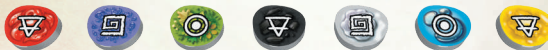

IMAGE


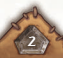

In [ ]:
# prompt: convert the chunks[1].metadata['images' to base64 and display them]

# Assuming chunks[1] exists and has the 'images' metadata
import base64
from IPython.display import Image, display

for base64_image in chunks[2].metadata['images']:
      print("IMAGE")
      image_data = base64.b64decode(chunks[2].metadata['images'][base64_image])
      display(Image(data=image_data))


In [ ]:
#add metadata
# for txt_file in tqdm(txt_files):
#     # Read text content from each TXT file
#     with open(os.path.join(path, txt_file), 'r', encoding='utf-8') as file:
#         text = file.read()
#     txt_texts.append(text)

# Read text content from each TXT file
# txt_dict = [{"game_name": txt_file.removesuffix(".txt").split("_")[0], "game_id": txt_file.removesuffix(".txt").split("_")[1]} for txt_file in txt_files]

book_name = "SpellBook_391834"
txt_dict = {
        "game_name": book_name.split("_")[0],
        "game_id": book_name.split("_")[1]
    }


In [ ]:

# Add txt_dict to the metadata of each chunk
for chunk in chunks:
    chunk.metadata['game_name'] = txt_dict['game_name']
    chunk.metadata['game_id'] = txt_dict['game_id']

In [ ]:
chunks[0].metadata

{'images': {'0_image_0.png': 'iVBORw0KGgoAAAANSUhEUgAAAasAAAB6CAIAAACOZusEAAEAAElEQVR4nIT9aZNkS5Ilhp2javded4+IjMjt7VXv1aulq7pqumd6FgwICDCECH8E/wp/Eb/ww4CECAgSAAdozEDQIGZ6eu9auqre/nKN1d3vNdPDD2o3MqsBCEOy6mVmZES4XzNTO+foUVX+X/7P/wkgQADNjKAU0aoigAAg0GigAwBEykgSoAEASIIAzQWAiBYSCAj9gzRJJCACgtQioCo1gMzvQAOcZoBAmplAASQkQVI7qFXBRDNC0UgjBxiNVEQoFAFA+ToISZLQ/1KS8r/rv0H/s0CCEBCkIAqU+usnvYGArL96SAEQsFh/R9LoyIdi1l90BFABKAQF1ACJEAjAAANgRno+VoIQQaq/VpFvPUVpXSaAvP8/gG/9g/67/kN/5yOfv4CQwkDQxQJzklC+qQAaIYmAQSCMDDAfkZk5aWYWsdCMRlKA0czM3R00MN9A5HMGDcF8jbnMoLFvhSBkxlIKodZCCtLNyyHUatvvD68u7+bjfLfMj84v/sOfnv6nn/z28Ucnd4faLg+vv9q/enH86kXU6wXY/fo43t7sf/R0+aN/8vTjf/6DYbP97d++/Nd/8tUf/+nrb290enK6223oXsrgZm5QxHE+SKVW7Y/7cXPy3Q/e+cef2h8++Xo54De/+PbL3169ej3jOKhsD0+fzmePqvlAK2aiEKrLHiDdzJxuIUKKCAj9KBnRT4rUIgIQhFxZIKJFA5BPFTD0Q3O/4usz1P1qBqDceFAgQojcpICJltsVg5kNRhppzCWHpMifDUTIIEO0CPci86gLIiKapOIWCkA0p7lZgYR+uNSiSYCCCICCyAIIaIBHy91NMxIC+n7oGwDrcSeZO8Gclhs+oKCBcLDAHOghw5CbjIggxb6bEK2BsDKWcWJxCP1pI1+qK0LRIBF5Ekl3mlEEBb

In [ ]:
def read_token_from_file(file_path="token.txt"):
    with open(file_path, "r") as file:
        return file.read().strip()

In [ ]:
from qdrant_client import QdrantClient
from langchain_qdrant import QdrantVectorStore
from langchain.embeddings import OpenAIEmbeddings  # Correct import path for OpenAI embeddings
import os

COLLECTION_NAME = "automatic_ingestion"
os.environ["OPENAI_API_KEY"] = read_token_from_file("/content/OpenAI.txt")
URL=read_token_from_file("/content/qdrant_URL.txt")
API_KEY=read_token_from_file("/content/qdrant.txt")
# Specify the folder path
# folder_path = "C:\\Users\\fiori\\OneDrive\\Documenti\\Rulebooks"
EMBEDDING_MODEL_NAME = "thenlper/gte-small"

In [ ]:
def add_embeddings_to_qdrant(docs_processed, URL, API_KEY, OPENAI_KEY, collection_name="test_2"):
    """Create embeddings for documents and add them to Qdrant."""

    URL=URL
    API_KEY=API_KEY

    if OPENAI_KEY:
        embedding_model = OpenAIEmbeddings(
            model="text-embedding-ada-002",  # Specify the desired OpenAI embedding model
        )

    else:
        embedding_model = HuggingFaceEmbeddings(
            model_name=EMBEDDING_MODEL_NAME,
            multi_process=True,  # Enable multiprocessing
            model_kwargs={"device": "cuda"},
            encode_kwargs={"normalize_embeddings": True},  # Set `True` for cosine similarity
        )


    vector_store = QdrantVectorStore.from_documents(
        docs_processed,
        embedding_model,
        url = URL,
        #prefer_grpc=True,
        api_key=API_KEY,
        collection_name=collection_name,
        force_recreate = False
    )

In [ ]:
add_embeddings_to_qdrant(chunks, URL, API_KEY, os.environ["OPENAI_API_KEY"], COLLECTION_NAME)

<ipython-input-19-a30c0a8da70e>:8: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embedding_model = OpenAIEmbeddings(
